### I will divide the project into Four parts:

##### (1) Exploring and Cleaning the Data

##### (2) Feature Engineering

##### (3) Choosing and building the Model

##### (4) How to further improve the Model

#### First I downloaded the zip file on my local machine and extracted the csv file and uploaded it to my anaconda and now I will read to make sense of the data

# (1) Exploring and Cleaning the Data 

In [20]:
# First we need to import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
pitches = pd.read_csv('pitches.csv')

C:\anaconda\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
# let's take a look at the data
pitches.head(11)

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
0,14143226,286874,2011,2011-03-31,108,118,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
1,14143227,286874,2011,2011-03-31,108,118,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
2,14143228,286874,2011,2011-03-31,108,118,1,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
3,14143229,286874,2011,2011-03-31,108,118,1,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
4,14143230,286874,2011,2011-03-31,108,118,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
5,14143231,286874,2011,2011-03-31,108,118,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
6,14143232,286874,2011,2011-03-31,108,118,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
7,14143233,286874,2011,2011-03-31,108,118,1,1,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
8,14143234,286874,2011,2011-03-31,108,118,1,1,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
9,14143235,286874,2011,2011-03-31,108,118,1,1,2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1


In [23]:
# let's take a look at how big the dataset is
pitches.shape

(718961, 125)

In [24]:
#First we want to drop coloumns that have all nans
pitches = pitches.dropna(axis=1, how='all')

In [25]:
# let's take a look at the dataset now
pitches.shape

(718961, 76)

In [26]:
# ok so there were 49 coloumns that only have nan values

In [27]:
pitches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718961 entries, 0 to 718960
Data columns (total 76 columns):
uid                718961 non-null int64
game_pk            718961 non-null int64
year               718961 non-null int64
date               718961 non-null object
team_id_b          718961 non-null int64
team_id_p          718961 non-null int64
inning             718961 non-null int64
top                718961 non-null int64
at_bat_num         718961 non-null int64
pcount_at_bat      718961 non-null int64
pcount_pitcher     718961 non-null int64
balls              718961 non-null int64
strikes            718961 non-null int64
fouls              718961 non-null int64
outs               718961 non-null int64
is_final_pitch     718961 non-null int64
final_balls        718961 non-null int64
final_strikes      718961 non-null int64
final_outs         718961 non-null int64
start_tfs          718961 non-null int64
start_tfs_zulu     718961 non-null object
batter_id          718961 

In [28]:
# We know that pitch_type is our target feature so let's look into the null pitch_type values
print('no.of rows that has nan value for the pitch_type feature', pitches.pitch_type.isnull().sum())

no.of rows that has nan value for the pitch_type feature 2280


In [29]:
#Since theses rows won't benefit our model, we can remove them from the dataset
pitches = pitches.drop(pitches[pitches.pitch_type.isnull()].index, axis = 0)

In [30]:
#based on my intutuion and a little help from my wife who knows more about baseball than me, I will drop some irrelevant features

dropped_features = ['pitch_tfs_zulu', 'pitch_tfs', 'final_outs', 'at_bat_des','type_confidence', 'modified_by', 'modified_at',
'added_at', 'date', 'sv_id', 'created_at', 'start_tfs', 'start_tfs_zulu', 'year', 'game_pk']
pitches = pitches.drop(dropped_features, axis = 1)
pitches.shape

(716681, 61)

In [31]:
# let's look at the types of features we have again
pitches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716681 entries, 26 to 718960
Data columns (total 61 columns):
uid               716681 non-null int64
team_id_b         716681 non-null int64
team_id_p         716681 non-null int64
inning            716681 non-null int64
top               716681 non-null int64
at_bat_num        716681 non-null int64
pcount_at_bat     716681 non-null int64
pcount_pitcher    716681 non-null int64
balls             716681 non-null int64
strikes           716681 non-null int64
fouls             716681 non-null int64
outs              716681 non-null int64
is_final_pitch    716681 non-null int64
final_balls       716681 non-null int64
final_strikes     716681 non-null int64
batter_id         716681 non-null int64
stand             716681 non-null object
b_height          716681 non-null object
pitcher_id        716681 non-null int64
p_throws          716681 non-null object
event             716681 non-null object
event2            8281 non-null object
event

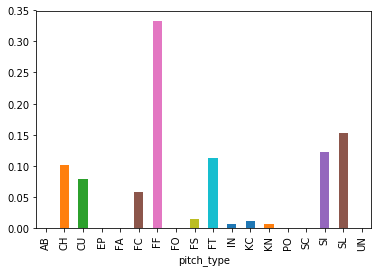

In [32]:
#ok now let's have a closer look at our target feature and see how balanced is the dataset
(pitches.groupby('pitch_type').count()['uid']/len(pitches)).plot.bar(ylim=0)
plt.show()

#####  we can see a class imbalance in the distribution. FF is the most common one.

In [33]:
pitches.pitch_type.value_counts()

FF    238541
SL    109756
SI     87740
FT     81056
CH     72641
CU     56379
FC     41702
FS     10503
KC      8490
KN      4450
IN      4058
PO       559
FO       329
FA       204
EP       134
SC       120
UN        17
AB         2
Name: pitch_type, dtype: int64

In [34]:
# We can drop AB and UN due to low value counts
pitches = pitches[pitches['pitch_type'] != 'AB']
pitches = pitches[pitches['pitch_type'] != 'UN']

In [35]:
# We can write a function to turn batter height from object to int
def change_ht(ht):
    ht_ = ht.split("-")
    ft_ = int(ht_[0])
    in_ = int(ht_[1].replace("\"",""))
    return (12*ft_) + in_

pitches['batter_height_in_inches'] = (pitches['b_height'].apply(lambda x:change_ht(x))).astype(int)
pitches = pitches.drop('b_height', axis = 1)

In [36]:
#Agian I will do another round of dropping features that's somehow irrelevant to the pitch type
dropped_features_2 = ['on_1b', 'on_2b', 'on_3b', 'cc', 'event2', 'event3', 'event4', 'score', 'uid', 'nasty']

pitches = pitches.drop(dropped_features_2, axis = 1)


In [37]:
pitches.shape

(716662, 51)

#### While that may look like I am throwing away a large portion of the dataset by dropping all of these columns, many of these columns were almost completely null values. The remainder were either so sparse they contributed very little data or were in my view unrelated to the current prediction task.

#### now it's time to choose a model for our dataset. I had several thoughts on which model I should choose,  since I am concerned with overfitting and since Random Forest Random forest is an ensemble method in which a classifier is constructed by combining several different Independent base classifiers. I decided to go with Random Forest

# (2) Feature Engineering

In [38]:
pitches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716662 entries, 26 to 718960
Data columns (total 51 columns):
team_id_b                  716662 non-null int64
team_id_p                  716662 non-null int64
inning                     716662 non-null int64
top                        716662 non-null int64
at_bat_num                 716662 non-null int64
pcount_at_bat              716662 non-null int64
pcount_pitcher             716662 non-null int64
balls                      716662 non-null int64
strikes                    716662 non-null int64
fouls                      716662 non-null int64
outs                       716662 non-null int64
is_final_pitch             716662 non-null int64
final_balls                716662 non-null int64
final_strikes              716662 non-null int64
batter_id                  716662 non-null int64
stand                      716662 non-null object
pitcher_id                 716662 non-null int64
p_throws                   716662 non-null object
even

#### So we have 5 coloumns as objects plus the Target feature. Since I will be using the random forest, I will use hot encoding to convert these objects into int's.


In [39]:

from sklearn.preprocessing import LabelBinarizer
type_b = LabelBinarizer()
stand_b = LabelBinarizer()
p_throws_b = LabelBinarizer()
pitch_des_b = LabelBinarizer()
event_b = LabelBinarizer()


new_type = type_b.fit_transform(pitches.type.values)
new_stand = stand_b.fit_transform(pitches.stand.values)
new_p_throws = p_throws_b.fit_transform(pitches.p_throws.values)
new_pitch_des = pitch_des_b.fit_transform(pitches.pitch_des.values)
new_event = event_b.fit_transform(pitches.event.values)

In [40]:
# Let's see if it converted correctly
print(new_type[0:10])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [41]:
print(new_type.shape)
print(new_stand.shape)
print(new_p_throws.shape)
print(new_pitch_des.shape)
print(new_event.shape)

(716662, 3)
(716662, 1)
(716662, 1)
(716662, 17)
(716662, 30)


##### Using LabelBinarizer form scikit learn, I have replaced the categorical (object type) data into columns of binary integers, this will preserve 

##### the information of these columns while still allowing them to be processed by the random forest. Now I will drop the original 

##### columns from the dataset and replace them with the numpy arrays generated by LabelBinarizer.


In [42]:
# Also I will drop the feature coloumn for now 
pitches_final = pitches.drop(['type', 'stand', 'p_throws', 'pitch_des', 'event', 'pitch_type'], axis=1)

In [43]:
# So for the first three features 
pitches_final['new_type_0'] = new_type[:, 0]
pitches_final['new_type_1'] = new_type[:, 1]
pitches_final['new_type_2'] = new_type[:, 2]
pitches_final['new_stand'] = new_stand[:, 0]
pitches_final['new_p_throws'] = new_p_throws[:, 0]

In [ ]:
# and for the remaining two features we will write this function
def column_creator(df, column, column_name):
    for i in range(column.shape[1]):
        df[column_name + '_' + str(i)] = column[:, i] 

In [ ]:
column_creator(pitches_final, new_pitch_des, 'new_pitch_des')
column_creator(pitches_final, new_event, 'new_event')

In [ ]:
# Now let's make sure the columns are being properly added to the original dataset.
pitches_final.columns

Index(['team_id_b', 'team_id_p', 'inning', 'top', 'at_bat_num',
       'pcount_at_bat', 'pcount_pitcher', 'balls', 'strikes', 'fouls', 'outs',
       'is_final_pitch', 'final_balls', 'final_strikes', 'batter_id',
       'pitcher_id', 'away_team_runs', 'home_team_runs', 'pitch_id', 'x', 'y',
       'start_speed', 'end_speed', 'sz_top', 'sz_bot', 'pfx_x', 'pfx_z', 'px',
       'pz', 'x0', 'z0', 'y0', 'vx0', 'vz0', 'vy0', 'ax', 'az', 'ay',
       'break_length', 'break_y', 'break_angle', 'zone', 'spin_dir',
       'spin_rate', 'batter_height_in_inches', 'new_type_0', 'new_type_1',
       'new_type_2', 'new_stand', 'new_p_throws', 'new_pitch_des_0',
       'new_pitch_des_1', 'new_pitch_des_2', 'new_pitch_des_3',
       'new_pitch_des_4', 'new_pitch_des_5', 'new_pitch_des_6',
       'new_pitch_des_7', 'new_pitch_des_8', 'new_pitch_des_9',
       'new_pitch_des_10', 'new_pitch_des_11', 'new_pitch_des_12',
       'new_pitch_des_13', 'new_pitch_des_14', 'new_pitch_des_15',
       'new_pitch_de

In [ ]:
print(pitches_final.info())
print(pitches_final.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716662 entries, 26 to 718960
Data columns (total 97 columns):
team_id_b                  716662 non-null int64
team_id_p                  716662 non-null int64
inning                     716662 non-null int64
top                        716662 non-null int64
at_bat_num                 716662 non-null int64
pcount_at_bat              716662 non-null int64
pcount_pitcher             716662 non-null int64
balls                      716662 non-null int64
strikes                    716662 non-null int64
fouls                      716662 non-null int64
outs                       716662 non-null int64
is_final_pitch             716662 non-null int64
final_balls                716662 non-null int64
final_strikes              716662 non-null int64
batter_id                  716662 non-null int64
pitcher_id                 716662 non-null int64
away_team_runs             716662 non-null int64
home_team_runs             716662 non-null int64
pitch_

In [ ]:
pitches_final = pitches_final.astype(np.float32)

# (3)  Building the Model

In [ ]:
# we will use sklearn model selection since it's a useful tool for dividing up the data to train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pitches_final, pitches['pitch_type'], test_size = 0.2)


#note that here we called our target feature(pitch_type since we dropped early in the code)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(n_estimators=10, max_features=20)
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.889


In [ ]:
# I have a decent PC so I can increase the max Features and see what I get

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(n_estimators=10, max_features=90)
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))

#### We can see that it overfitted on the training data but we were able to get 93.5% accuracy on the test set, There are some things I would incorporate in future models as I deploy them in the real world. 



# How to further improve the model


### To futher improve upon the model of predicting the next pitch we can also perform gridsearch using ROC-score as the metric to find optimal parameters for our model.


### We can compare results with other classification models.


### It is also possible to add last years data for each player



### We can try to combine data from specific batter-pitcher matchups to fine-tune the predictions

### try to pay attention to the sequence aspect present in real games so that the model can be aware of what the pitcher threw in the past 2 or 3 pitches as pitchers are known to set up pitches.

# Thank you